In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

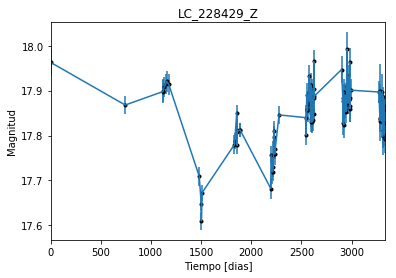

In [2]:
data = np.genfromtxt('LC_228429_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_228429_Z')
plt.savefig("LC_228429_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

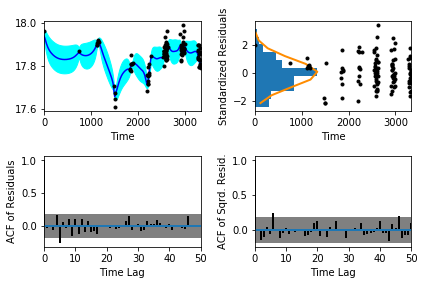

In [5]:
sample.assess_fit()

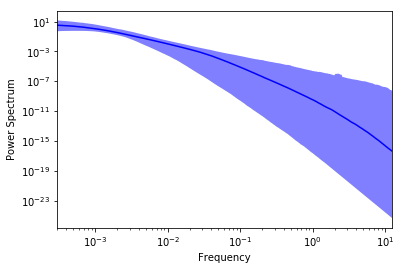

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

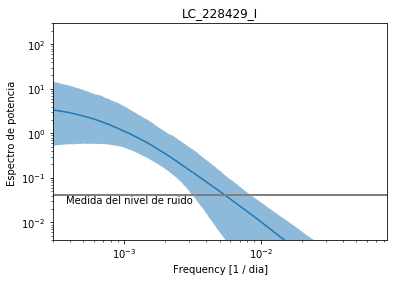

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_228429_I')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_228429_Z')

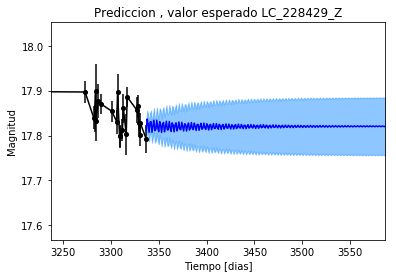

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_228429_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_228429_Z')

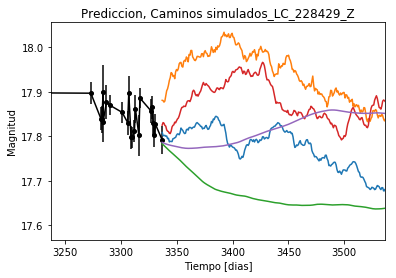

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_228429_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


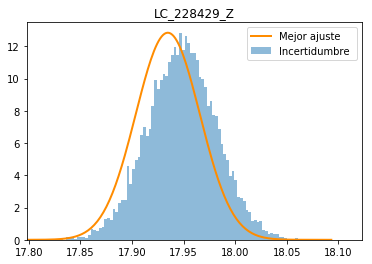

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_228429_Z')
plt.savefig("Mejor_ajuste_LC_228429_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_228429_Z')

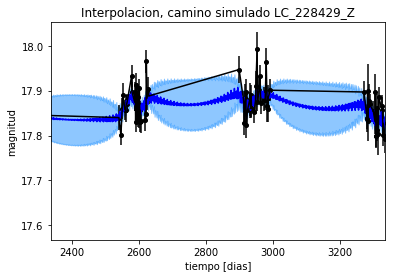

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_228429_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_228429_Z')

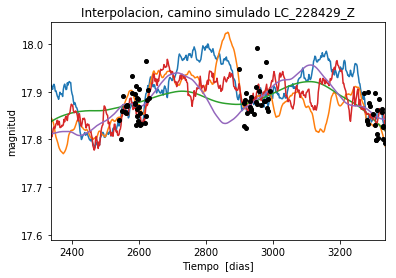

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_228429_Z')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 443.767563137
Median: 0.0586150477846
Standard deviation: 4.05916674602
68% credibility interval: [  1.83764571e-03   2.22222480e+00]
95% credibility interval: [  4.31326047e-04   1.62113448e+01]
99% credibility interval: [  3.18928837e-04   2.24191729e+01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 589.35284964
Median: 0.00948532828247
Standard deviation: 1.90829323242
68% credibility interval: [ 0.00063486  0.31657832]
95% credibility interval: [  3.32073939e-04   5.35004679e+00]
99% credibility interval: [  3.10542424e-04   1.55618297e+01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 345.127749381
Median: 0.1216533

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 419.04724651
Median: 282.225265903
Standard deviation: 1.70559322042
68% credibility interval: [ 280.37206241  283.37499983]
95% credibility interval: [ 277.88320568  284.26230422]
99% credibility interval: [ 275.80742739  286.54499944]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 414.823384556
Median: 5.61837742936
Standard deviation: 46.4333509452
68% credibility interval: [  0.27028974  67.9598837 ]
95% credibility interval: [  3.36884767e-02   1.54737455e+02]
99% credibility interval: [  1.77693075e-02   2.24488128e+02]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 811.574193116
Median: 92.2132556621
Standard deviation: 4998.00832995
68% credibility interval: [  1.12154003e+00   3.22504591e+03]
95% credibil

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 15615.6027121
Median: 3.35489135933e-45
Standard deviation: 1.04874487008e+134
68% credibility interval: [  4.75278024e-97   2.21336275e-04]
95% credibility interval: [  7.19635516e-149   1.47108901e+098]
99% credibility interval: [  3.81202698e-161   2.45711485e+113]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2767.87268411
Median: 17.8443343365
Standard deviation: 0.0425127161428
68% credibility interval: [ 17.81182621  17.88337564]
95% credibility interval: [ 17.76652064  17.94035465]
99% credibility interval: [ 17.72144798  17.98275359]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 679.036104763
Median: 0.383011196993
Standard deviation: 5.54291628515
68% credibility interval: [ 0.          7.42586736]
95% credibility interval: [  0.          20.72365406]
99% credibility interval: [  0.          24.04210467]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 679.036104763
Median: 0.383011196993
Standard deviation: 5.54291628515
68% credibility interval: [ 0.          7.42586736]
95% credibility interval: [  0.          20.72365406]
99% credibility interval: [  0.          24.04210467]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2580.84819507
Median: 0.0
Standard deviation: 0.000426455280092
68

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 419.04724651
Median: 282.225265903
Standard deviation: 1.70559322042
68% credibility interval: [ 280.37206241  283.37499983]
95% credibility interval: [ 277.88320568  284.26230422]
99% credibility interval: [ 275.80742739  286.54499944]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1543.96307118
Median: 0.00796956098338
Standard deviation: 0.00846926015846
68% credibility interval: [ 0.00498843  0.01390228]
95% credibility interval: [ 0.00345424  0.02651107]
99% credibility interval: [ 0.00273737  0.04836904]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1053.87447051
Median: 1.31562783817
Standard deviation: 0.190284858607
68% credibility interval: [ 1.13774122  1.51272786]
95% credibility interval: [ 0.98964608  1.72974903]
99% credibility interval: [ 0.88274197  1.85615637]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 456.992296919
Median: 0.117436418829
Standard deviation: 1497.50452282
68% credibility interval: [  1.38808559e-04   2.48357694e+01]
95% credibility interval: [  2.72812494e-101   1.69313582e+003]
99% credibility interval: [  8.57785125e-115   1.36863658e+004]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 443.767563137
Median: (-0.36828920702-3.52213621053j)
Standard deviation: 43.1672461649
68% credibility interval: [ -1.39626502e+01-93.84413044j  -1.15462685e-02-14.43300352j]
95% credibility interval: [ -1.01858883e+02-2.26075608j  -2.71010148e-03-3.36913848j]
99% credibility interval: [ -1.40863818e+02+0.j          -2.00388899e-03-2.54908025j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 589.35284964
Median: (-0.0595980752982+35.0683253038j)
Standard deviation: 36.8333506255
68% credibility interval: [-1.98912025+39.4817342j  -0.00398892 +1.10194348j]
95% credibility interval: [ -3.36153354e+01+1.11776664j  -2.08648209e-03+0.j        ]
99% credibility interval: [ -9.77778600e+01+35.64018261j  -1.95119559e-03 +0.j 